# Review: Solutions

In [1]:
suppressPackageStartupMessages(library(tidyverse))

Warning message:
“Installed Rcpp (0.12.12) different from Rcpp used to build dplyr (0.12.11).
Please reinstall dplyr to avoid random crashes or undefined behavior.”Warning message:
“package ‘dplyr’ was built under R version 3.4.1”

**1**. Generate a sequence of the numbers `10,9,8,7,6,5,4,3,2,1`

In [2]:
x <- 10:1
x

[1] 10  9  8  7  6  5  4  3  2  1

**2**. Extract only numbers divisible by 3 from the sequence generated in Q1.

In [3]:
x[x %% 3 == 0]

[1] 9 6 3

**3**. Generate the sequence `1,2,3,4,1,2,3,4,1,2,3,4`

In [4]:
rep(1:4, 3)

[1] 1 2 3 4 1 2 3 4 1 2 3 4

**4**. Generate the sequence `1,1,1,1,2,2,2,2,3,3,3,3`

In [5]:
rep(1:4, each=3)

[1] 1 1 1 2 2 2 3 3 3 4 4 4

**5**. Replace all odd numbers in Q1 with their square and leave the even numbers the same

In [6]:
ifelse(x %% 2 == 1, x^2, x)

[1] 10 81  8 49  6 25  4  9  2  1

**6**. Generate a matrix containing all sliding windows of length 4 from the sequence in Q1. The first row is `10,9,8,7` and the last one is `4,3,2,1`

In [7]:
n <- length(x)
width <- 4
nrows <- n - width + 1
m <- matrix(NA, nrows, width)
for (i in 1:nrows) {
     m[i,] = x[i:(i+width-1)]
}
m

[,1] [,2] [,3] [,4]
[1,] 10   9    8    7   
[2,]  9   8    7    6   
[3,]  8   7    6    5   
[4,]  7   6    5    4   
[5,]  6   5    4    3   
[6,]  5   4    3    2   
[7,]  4   3    2    1

**7**. Generate the matrix shown below and find the row and column sums

| | | | |
|-|-|-|-|
|1|2|3|4|
|5|1|7|8|
|9|10|NA|12|
|13|14|15|1|

In [8]:
m <- matrix(1:16, byrow=T, nrow=4)
diag(m) <- 1
m[3,3] = NA
m

[,1] [,2] [,3] [,4]
[1,]  1    2    3    4  
[2,]  5    1    7    8  
[3,]  9   10   NA   12  
[4,] 13   14   15    1

In [9]:
apply(m, 1, sum)

[1] 10 21 NA 43

In [10]:
apply(m, 2, sum)

[1] 28 27 NA 25

**8**. Scale the matrix from Q7 so each **row** has mean of 0 and standard deviation of 1. 

In [11]:
sm <- t(scale(t(m)))
sm

[,1]        [,2]       [,3]      [,4]      
[1,] -1.16189500 -0.3872983 0.3872983  1.1618950
[2,] -0.08075729 -1.3728739 0.5653010  0.8883301
[3,] -0.87287156 -0.2182179        NA  1.0910895
[4,]  0.34345475  0.4961013 0.6487479 -1.4883039

In [12]:
round(apply(sm, 1, mean, na.rm=T), 2)

[1] 0 0 0 0

In [13]:
apply(sm, 1, sd, na.rm=T)

[1] 1 1 1 1

**9**. Generate and assign row names `pt-1, pt-2, pt-3, pt-4` and column names `gene.1, gene.2, gene.3, gene.4` to the matrix from Q7.

In [14]:
rownames(m) = paste("pt", 1:4, sep="-")
colnames(m) = paste("gene", 1:4, sep=".")
m

gene.1 gene.2 gene.3 gene.4
pt-1  1      2      3      4    
pt-2  5      1      7      8    
pt-3  9     10     NA     12    
pt-4 13     14     15      1

**10**. Convert the matrix from Q7 to a `data.frame` and add a column `group` with values `A,B,A,B`.

In [15]:
df <- data.frame(m, group=c('A', 'B', 'A', 'B'))
df

gene.1 gene.2 gene.3 gene.4 group
pt-1  1      2      3      4     A    
pt-2  5      1      7      8     B    
pt-3  9     10     NA     12     A    
pt-4 13     14     15      1     B

**11**. Remove the row with a missing value (NA) from the `data.frame` in Q10.

In [16]:
df1 <- df %>% drop_na()
df1

gene.1 gene.2 gene.3 gene.4 group
pt-1  1      2      3     4      A    
pt-2  5      1      7     8      B    
pt-4 13     14     15     1      B

**12**. Find the average value of each gene by group using the `data.frame` from Q11.

In [17]:
df1 %>% group_by(group) %>%
summarise_all(mean)

group gene.1 gene.2 gene.3 gene.4
1 A     1      2.0     3     4.0   
2 B     9      7.5    11     4.5

**13**. Reshape the `data.frame` from Q10 to have only 3 columns `group`, `gene`, `value`. The `geen` column should have entries such as `gene:1`.

In [18]:
df %>% gather(gene, value, -group)

group gene   value
1  A     gene.1  1   
2  B     gene.1  5   
3  A     gene.1  9   
4  B     gene.1 13   
5  A     gene.2  2   
6  B     gene.2  1   
7  A     gene.2 10   
8  B     gene.2 14   
9  A     gene.3  3   
10 B     gene.3  7   
11 A     gene.3 NA   
12 B     gene.3 15   
13 A     gene.4  4   
14 B     gene.4  8   
15 A     gene.4 12   
16 B     gene.4  1

**14**. Sort the `data.frame` from Q11 in decreasing order of `gene:1`.

In [19]:
df1 %>% arrange(desc(gene.1))

gene.1 gene.2 gene.3 gene.4 group
1 13     14     15     1      B    
2  5      1      7     8      B    
3  1      2      3     4      A

**15**. Replace all missing value with the column mean for the `data.frame` from Q10. group. Create a new data.frame that contains only the `log` values for all genes and the `group` column.

In [20]:
df[is.na(df)] <- mean(df$gene.1)
df2 <- df %>% mutate_if(is.numeric, log)
df2

gene.1   gene.2    gene.3   gene.4   group
1 0.000000 0.6931472 1.098612 1.386294 A    
2 1.609438 0.0000000 1.945910 2.079442 B    
3 2.197225 2.3025851 1.945910 2.484907 A    
4 2.564949 2.6390573 2.708050 0.000000 B

**16**. create a new `data.frame` with columns for `genes.5`, `genes.6`, rows for `pt-2, pt-3, pt-1, pt-4` (in this order) and values drawn from a Poisson distribution with rate 10. Merge this with the `data.frame` from Q10 to get  a new `data.frame` with 4 rows and 7 columns.

In [21]:
m <- matrix(rpois(8, 10), 4, 2)
rownames(m) <- paste('pt', c(2,3,1,4), sep='-')
colnames(m) <- paste('gene', 5:6, sep=',')
df3 <- data.frame(m)
df3

gene.5 gene.6
pt-2  7     16    
pt-3 10     11    
pt-1  3      5    
pt-4  8      5

In [22]:
(df %>% rownames_to_column('key')) %>% 
full_join((df3 %>% rownames_to_column('key')), by='key') %>%
column_to_rownames('key')

gene.1 gene.2 gene.3 gene.4 group gene.5 gene.6
pt-1  1      2      3      4     A      3      5    
pt-2  5      1      7      8     B      7     16    
pt-3  9     10      7     12     A     10     11    
pt-4 13     14     15      1     B      8      5

**17**. Generate data using the code shown below. Then fit a linear model to the data and print the coefficients and associated p-values for `x1, x2, x3`.

```R
set.seed(123)
n <- 10
x1 <- runif(n, 0, 10)
x2 <- runif(n, 0, 10)
x3 <- runif(n, 0, 10)
y <- 2 + 0.5*x1 + 0.05*x3 + rnorm(n)
df <- data.frame(y=y, x1=x1, x2=x2, x3=x3)
```

In [23]:
set.seed(123)
n <- 10
x1 <- runif(n, 0, 10)
x2 <- runif(n, 0, 10)
x3 <- runif(n, 0, 10)
y <- 2 + 0.5*x1 + 0.05*x3 + rnorm(n)
df <- data.frame(y=y, x1=x1, x2=x2, x3=x3)

In [24]:
fit <- lm(y ~ x1 + x2 + x3, data=df)

In [25]:
summary(fit)


Call:
lm(formula = y ~ x1 + x2 + x3, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66716 -0.36824 -0.07808  0.50262  1.39160 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -1.2514     1.7969  -0.696   0.5122  
x1            0.6710     0.1834   3.659   0.0106 *
x2            0.1676     0.1560   1.074   0.3241  
x3            0.2244     0.1419   1.582   0.1648  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.035 on 6 degrees of freedom
Multiple R-squared:  0.8142,	Adjusted R-squared:  0.7214 
F-statistic: 8.767 on 3 and 6 DF,  p-value: 0.01301


In [26]:
coef(summary(fit))

Estimate   Std. Error t value    Pr(>|t|)  
(Intercept) -1.2513962 1.7968727  -0.6964301 0.51222230
x1           0.6709867 0.1834009   3.6585786 0.01059738
x2           0.1675740 0.1560274   1.0740036 0.32410345
x3           0.2244258 0.1418759   1.5818453 0.16477061

In [27]:
coef(summary(fit))[2:4,4]

x1         x2         x3 
0.01059738 0.32410345 0.16477061

### Brief note on using R formula

Meaning of symbols in R formula:

| Formula | Definition                                   | Example       | Interpretation                                            |
|:--------|:---------------------------------------------|:--------------|:----------------------------------------------------------|
| ~       | Is modeled as                                | Y ~ X         | Y is modeled as a function of X                           |
| 1       | Intercept                                    | Y ~ X - 1     | Exclude intercept                                         |
| +       | Include                                      | +X            | Include X                                                 |
| -       | Exclude                                      | -X            | Exclude X                                                 |
| :       | Interaction                                  | U:V           | Interaction between U an V                                |
| *       | Include with interactions                    | U*V           | U + V + U:V                                               |
| ^       | Include with interactions up to given degree | (U + V + W)^2 | U + V + W + U:W + U:V + W:V                               |
| I       | As is                                        | I(U * V)      | X $\times$ Y                                              |
| .       | Everything else                              | Y ~ .         | Y is modeled as a function of all other variables in data |


In [28]:
summary(lm(y ~ ., data=df))


Call:
lm(formula = y ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66716 -0.36824 -0.07808  0.50262  1.39160 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -1.2514     1.7969  -0.696   0.5122  
x1            0.6710     0.1834   3.659   0.0106 *
x2            0.1676     0.1560   1.074   0.3241  
x3            0.2244     0.1419   1.582   0.1648  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.035 on 6 degrees of freedom
Multiple R-squared:  0.8142,	Adjusted R-squared:  0.7214 
F-statistic: 8.767 on 3 and 6 DF,  p-value: 0.01301


**18**. Fit a linear model to the data below. Explain the results.

```R
set.seed(123)
n <- 10
x1 <- 1:10
x2 <- seq(2,20,by=2)
x3 <- seq(3,30,by=3)
y <- 2 + 0.5*x1 + 0.05*x3 + rnorm(n)
df <- data.frame(y=y, x1=x1, x2=x2, x3=x3)
```

In [29]:
set.seed(123)
n <- 10
x1 <- 1:10
x2 <- seq(2,20,by=2)
x3 <- seq(3,30,by=3)
y <- 2 + 0.5*x1 + 0.05*x3 + rnorm(n)
df <- data.frame(y=y, x1=x1, x2=x2, x3=x3)

In [30]:
summary(lm(y ~ ., data=df))


Call:
lm(formula = y ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1348 -0.5624 -0.1393  0.3854  1.6814 

Coefficients: (2 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.5255     0.6673   3.785 0.005352 ** 
x1            0.5680     0.1075   5.282 0.000744 ***
x2                NA         NA      NA       NA    
x3                NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9768 on 8 degrees of freedom
Multiple R-squared:  0.7772,	Adjusted R-squared:  0.7493 
F-statistic:  27.9 on 1 and 8 DF,  p-value: 0.0007444


### Interpretation

`x1`, `,x2` and `x3` are linear combination of each other. For example

`y = a + b1*x1 + b2*x2 + b3*x3`

will always have the same values as

`y = a + b1*x1 + b2*(2*x1) + b3*(3*x1)`

which is, for some coefficient `k`, the same as

`y = a + k*x1`

and so the 3 `x` variables are linearly dependent and effectively only a single variable.

**19**. Load the data set at https://www.openintro.org/stat/data/bdims.csv into a `data.frame` using `read.csv`. Use `knn` with 5 neighbors on the `wgt` and `hgt` columns to predict the `sex` and generate a classification table of true and predicted values from LOOCV.

In [31]:
bdims <- read.csv('https://www.openintro.org/stat/data/bdims.csv')

In [32]:
head(bdims)

bia.di bii.di bit.di che.de che.di elb.di wri.di kne.di ank.di sho.gi ⋯
1 42.9   26.0   31.5   17.7   28.0   13.1   10.4   18.8   14.1   106.2  ⋯
2 43.7   28.5   33.5   16.9   30.8   14.0   11.8   20.6   15.1   110.5  ⋯
3 40.1   28.2   33.3   20.9   31.7   13.9   10.9   19.7   14.1   115.1  ⋯
4 44.3   29.9   34.0   18.4   28.2   13.9   11.2   20.9   15.0   104.5  ⋯
5 42.5   29.9   34.0   21.5   29.4   15.2   11.6   20.7   14.9   107.5  ⋯
6 43.3   27.0   31.5   19.6   31.3   14.0   11.5   18.8   13.9   119.8  ⋯
  bic.gi for.gi kne.gi cal.gi ank.gi wri.gi age wgt  hgt   sex
1 32.5   26.0   34.5   36.5   23.5   16.5   21  65.6 174.0 1  
2 34.4   28.0   36.5   37.5   24.5   17.0   23  71.8 175.3 1  
3 33.4   28.8   37.0   37.3   21.9   16.9   28  80.7 193.5 1  
4 31.0   26.2   37.0   34.8   23.0   16.6   23  72.6 186.5 1  
5 32.0   28.4   37.7   38.6   24.4   18.0   22  78.8 187.2 1  
6 33.0   28.0   36.6   36.1   23.5   16.9   21  74.8 181.5 1

In [33]:
library(class)

In [34]:
X <- bdims %>% select(wgt, hgt)
y <- bdims$sex
n <- nrow(bdims) 
k <- 5

pred <- numeric(n)
for (i in (1:n)) {
    train <- X[-i,]
    test <- X[i,]
    cls <- y[-i]
    pred[i] <- knn(train, test, cls, k)
}

In [35]:
table(pred, y)

    y
pred   0   1
   1 218  41
   2  42 206

**20**. Using the same data set from Q19, perform a linear regression to predict the age from the 5 variables most correlated with the age. Use LOOCV correctly to get predicted age for each subject.  Calculate the root mean square error (square root of average of the squared residuals) from the LOOCV predictions. Plot the predicted against the observed ages.

In [36]:
n <- nrow(bdims)
pred <- numeric(n)

yy <- bdims$age
XX <- bdims %>% select(-age)

for (i in 1:n) {

    stats <- cor(yy[-i], XX[-i,])
    ii <- order(desc(abs(stats)))
    X <- XX[-i, ii[1:5]]
    y <- yy[-i]
    df <- data.frame(y, X)
    model <- lm(y ~ ., data=df)
    pred[i] <- predict(model, XX[i,])
}

In [37]:
rms <- sqrt(mean((yy - pred)^2))
round(rms, 2)

[1] 8.62

In [40]:
options(repr.plot.width=6, repr.plot.height=4)

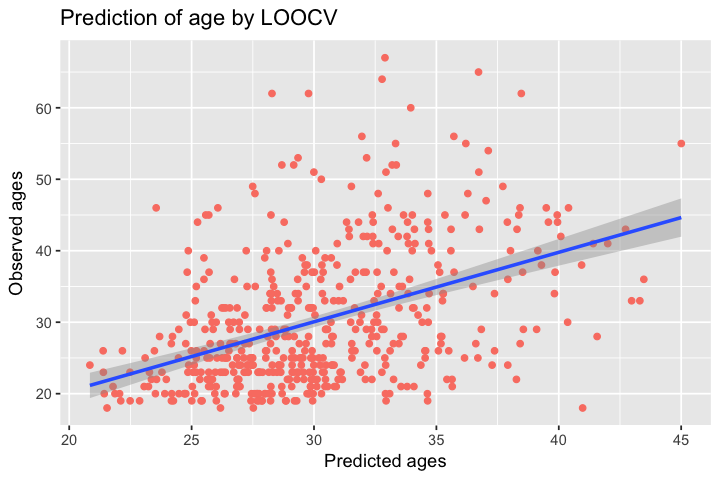

In [41]:
# ggplot2 only works on `data.frames`
results <- data.frame(observed=yy, predicted=pred)

ggplot(results, aes(x=pred, y=observed)) + # map properties to visual elemeents with `aes`
geom_point(color='salmon') + # plot tye ith `geom` (scatter plot)
geom_smooth(method='lm') + # add another plot type (linear regresion fit)
labs(x="Predicted ages", y="Observed ages", title="Prediction of age by LOOCV") # set custom lables